   # The Data

In [7]:
# Imports 
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

2021-09-07 10:42:43.580064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-07 10:42:43.580138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df = pd.read_csv('../cryptocurrency_trading/data/final_data_from_2018_01_01_to_2021_08_31.csv')

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,start,tweet_count,sentimentscore,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,real_score,post_per_day
0,2018-01-01,90414,4.087525,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,1.029120e+10,...,-3.224,13641.36686,-0.03224,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
1,2018-01-02,125905,4.721295,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1.684660e+10,...,9.960,14530.09961,0.09960,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2,2018-01-03,134825,6.096648,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,1.687190e+10,...,1.487,15206.09994,0.01487,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
3,2018-01-04,126106,4.738479,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,2.178320e+10,...,2.151,15287.03353,0.02151,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
4,2018-01-05,115883,5.809624,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,2.384090e+10,...,12.614,16779.16634,0.12614,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [13]:
df = df.drop(columns = ['changeOverTime'])

In [20]:
df = df[:1295]

In [23]:
df = df.rename(columns={'sentimentscore': 'twitter_sentiment', 'real_score': 'reddit_sentiment','post_per_day':'reddit_post_count'})

In [25]:
df.head()

,start,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-01,90414,4.087525,13657.200195,1.029120e+10,-3.224,13641.36686,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
1,2018-01-02,125905,4.721295,14982.099609,1.684660e+10,9.960,14530.09961,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2,2018-01-03,134825,6.096648,15201.000000,1.687190e+10,1.487,15206.09994,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
3,2018-01-04,126106,4.738479,15599.200195,2.178320e+10,2.151,15287.03353,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
4,2018-01-05,115883,5.809624,17429.500000,2.384090e+10,12.614,16779.16634,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [26]:
df.tail()

,start,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
1290,2021-08-27,318837,0.755258,49058.667969,3.451108e+10,4.615,48188.57813,53283.267528,27543.956222,1604.742754,61.333674,2205.235921,0.472290,269.0
1291,2021-08-28,275021,2.404883,48902.402344,2.856810e+10,-0.347,48895.04818,53660.398373,27771.001002,1632.908812,60.758105,2139.546072,0.417047,219.0
1292,2021-08-29,321682,1.261597,48829.832031,2.588965e+10,-0.166,48799.93359,53996.130503,28047.641373,1645.660840,60.474282,2057.908289,0.835773,199.0
1293,2021-08-30,305249,1.388991,47054.984375,3.184701e+10,-3.645,47643.62109,54211.850902,28344.512848,1583.112611,53.848934,1828.911828,0.722232,232.0
1294,2021-08-31,296186,1.899930,47166.687500,3.473036e+10,0.303,47368.77734,54380.425623,28736.371721,1332.427984,54.189103,1637.567137,0.628596,259.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   start           1295 non-null   object 
 1   tweet_count     1295 non-null   int64  
 2   sentimentscore  1251 non-null   float64
 3   adjClose        1295 non-null   float64
 4   volume          1295 non-null   float64
 5   changePercent   1295 non-null   float64
 6   vwap            1295 non-null   float64
 7   UpperBB         1295 non-null   float64
 8   LowerBB         1295 non-null   float64
 9   volatility      1295 non-null   float64
 10  rsi             1295 non-null   float64
 11  macd            1295 non-null   float64
 12  real_score      1201 non-null   float64
 13  post_per_day    1201 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 141.8+ KB


In [75]:
df.shap

(1295, 14)

# The Model


In [114]:
df = df.set_index('start')

In [115]:
df.head()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,,,,,
2018-01-01,90414,4.087525,13657.200195,1.029120e+10,-3.224,13641.36686,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
2018-01-02,125905,4.721295,14982.099609,1.684660e+10,9.960,14530.09961,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2018-01-03,134825,6.096648,15201.000000,1.687190e+10,1.487,15206.09994,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
2018-01-04,126106,4.738479,15599.200195,2.178320e+10,2.151,15287.03353,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
2018-01-05,115883,5.809624,17429.500000,2.384090e+10,12.614,16779.16634,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [143]:
df.describe()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
count,1295.000000,1251.000000,1295.000000,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1201.000000,1201.000000
mean,95216.486486,4.004496,15172.254281,2.463181e+10,0.183723,15140.318650,18206.198166,11039.826584,862.930606,52.252337,154.744315,0.434781,251.019151
std,87497.562638,2.159734,14716.895342,2.171723e+10,4.000777,14668.899023,17512.931521,10675.075977,1087.547778,14.335364,1110.764108,0.351883,149.406265
min,29265.000000,-0.524593,3236.761719,2.923670e+09,-37.187000,3234.481040,3994.801134,2277.308319,37.475515,9.920239,-5053.254798,-0.750258,11.000000
25%,45644.000000,2.242963,6843.328857,7.258674e+09,-1.522000,6833.774010,8348.078310,5696.173578,217.072081,42.561986,-225.581168,0.252901,149.000000
50%,58581.000000,4.060017,9190.854492,1.970970e+10,0.132000,9169.193030,10680.118170,6992.782247,422.904464,51.300568,7.688936,0.522565,199.000000
75%,94609.000000,5.532219,12346.645019,3.461106e+10,1.864500,12213.081055,17161.398239,9674.992451,922.110833,61.620811,369.572592,0.698950,304.000000
max,905884.000000,15.148350,63503.457031,3.509679e+11,18.797000,63114.882810,68529.194252,50666.918581,7090.539451,90.719554,5289.956609,0.936437,1000.000000


In [148]:
df.head()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,,,,,
2018-01-01,90414,4.087525,13657.200195,1.029120e+10,-3.224,13641.36686,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
2018-01-02,125905,4.721295,14982.099609,1.684660e+10,9.960,14530.09961,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2018-01-03,134825,6.096648,15201.000000,1.687190e+10,1.487,15206.09994,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
2018-01-04,126106,4.738479,15599.200195,2.178320e+10,2.151,15287.03353,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
2018-01-05,115883,5.809624,17429.500000,2.384090e+10,12.614,16779.16634,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [149]:
df.tail()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,,,,,
2021-08-27,318837,0.755258,49058.667969,3.451108e+10,4.615,48188.57813,53283.267528,27543.956222,1604.742754,61.333674,2205.235921,0.472290,269.0
2021-08-28,275021,2.404883,48902.402344,2.856810e+10,-0.347,48895.04818,53660.398373,27771.001002,1632.908812,60.758105,2139.546072,0.417047,219.0
2021-08-29,321682,1.261597,48829.832031,2.588965e+10,-0.166,48799.93359,53996.130503,28047.641373,1645.660840,60.474282,2057.908289,0.835773,199.0
2021-08-30,305249,1.388991,47054.984375,3.184701e+10,-3.645,47643.62109,54211.850902,28344.512848,1583.112611,53.848934,1828.911828,0.722232,232.0
2021-08-31,296186,1.899930,47166.687500,3.473036e+10,0.303,47368.77734,54380.425623,28736.371721,1332.427984,54.189103,1637.567137,0.628596,259.0


In [151]:
from sklearn.impute import KNNImputer

In [157]:
imputer = KNNImputer(n_neighbors=2)
df['reddit_sentiment'],df['reddit_post_count'],df['twitter_sentiment'] = imputer.fit_transform(df[['reddit_sentiment','reddit_post_count','twitter_sentiment']]).T

In [169]:
df.isnull().sum()

tweet_count          0
twitter_sentiment    0
adjClose             0
volume               0
changePercent        0
vwap                 0
UpperBB              0
LowerBB              0
volatility           0
rsi                  0
macd                 0
reddit_sentiment     0
reddit_post_count    0
dtype: int64

In [170]:
df.isnull().values.sum(axis = 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [171]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [172]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [173]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [174]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [275]:
w1 = WindowGenerator(input_width=48, label_width=1, shift=1,
                     label_columns=['adjClose'])
w1

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['adjClose']

In [276]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=1,
                     label_columns=['adjClose'])
w2

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['adjClose']

In [277]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [278]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 13)
Inputs shape: (3, 24, 13)
Labels shape: (3, 1, 1)


In [279]:
w2.example = example_inputs, example_labels

AttributeError: can't set attribute

In [280]:
def plot(self, model=None, plot_col='adjClose', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

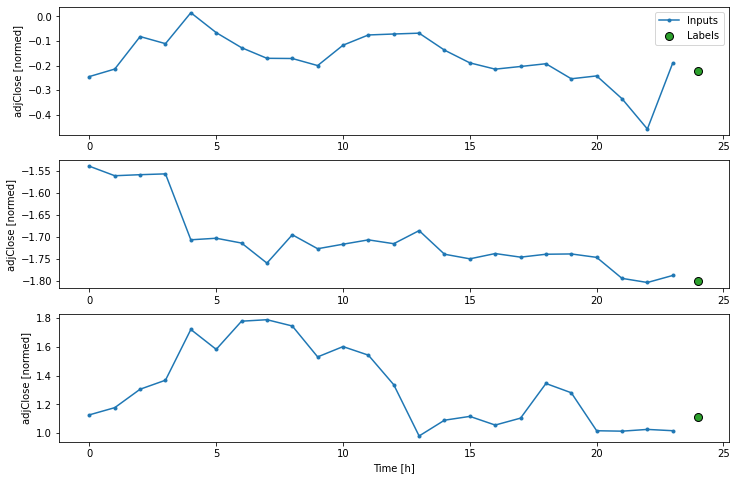

In [281]:
w2.plot()

In [282]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [283]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [284]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 24, 13), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [285]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 13)
Labels shape (batch, time, features): (32, 1, 1)


In [286]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['adjClose'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['adjClose']

In [287]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 13)
Labels shape (batch, time, features): (32, 1, 1)


In [288]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [289]:
baseline = Baseline(label_index=column_indices['adjClose'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

9/9 [==============================] - 0s 3ms/step - loss: 0.3188 - mean_absolute_error: 0.3417


In [290]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['adjClose'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['adjClose']

In [291]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


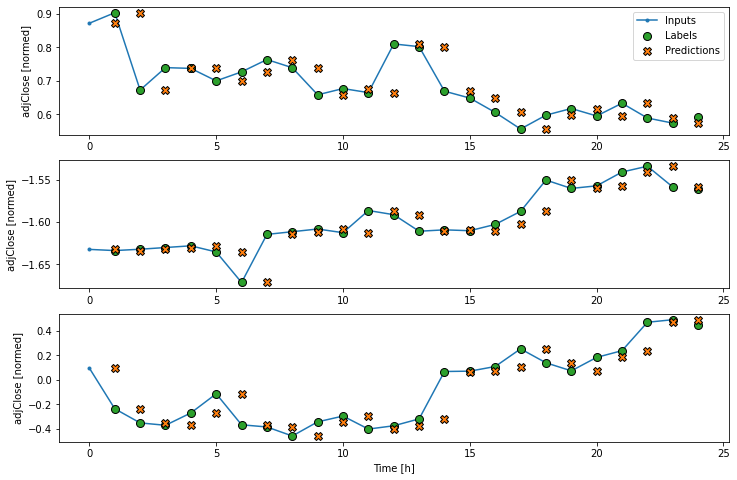

In [292]:
wide_window.plot(baseline)

In [293]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [294]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 13)
Output shape: (32, 1, 1)


In [295]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [296]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
29/29 [==============================] - 1s 19ms/step - loss: 1.6281 - mean_absolute_error: 0.9438 - val_loss: 70.3331 - val_mean_absolute_error: 6.2571
Epoch 2/20
29/29 [==============================] - 0s 12ms/step - loss: 1.2941 - mean_absolute_error: 0.8416 - val_loss: 52.0482 - val_mean_absolute_error: 5.3403
Epoch 3/20
29/29 [==============================] - 0s 12ms/step - loss: 1.0362 - mean_absolute_error: 0.7557 - val_loss: 37.8358 - val_mean_absolute_error: 4.4996
Epoch 4/20
29/29 [==============================] - 0s 14ms/step - loss: 0.8368 - mean_absolute_error: 0.6810 - val_loss: 27.4352 - val_mean_absolute_error: 3.7634
Epoch 5/20
29/29 [==============================] - 0s 14ms/step - loss: 0.6848 - mean_absolute_error: 0.6171 - val_loss: 20.1480 - val_mean_absolute_error: 3.1444
Epoch 6/20
29/29 [==============================] - 0s 11ms/step - loss: 0.5696 - mean_absolute_error: 0.5626 - val_loss: 15.0928 - val_mean_absolute_error: 2.6427
Epoch 7/20
29/29

In [297]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


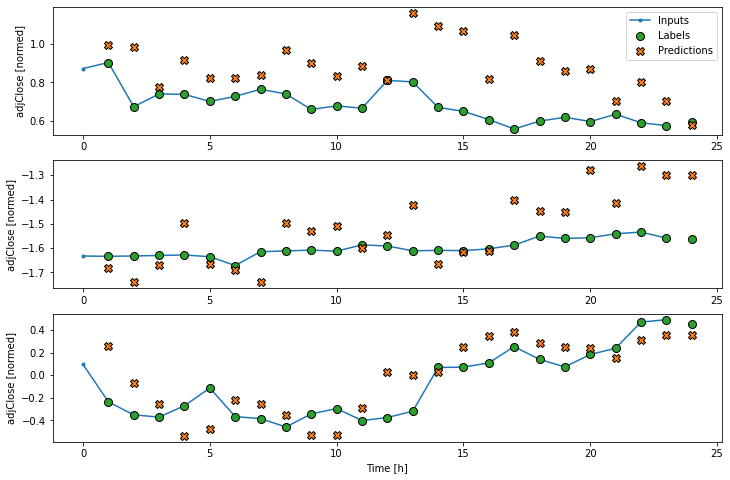

In [298]:
wide_window.plot(linear)

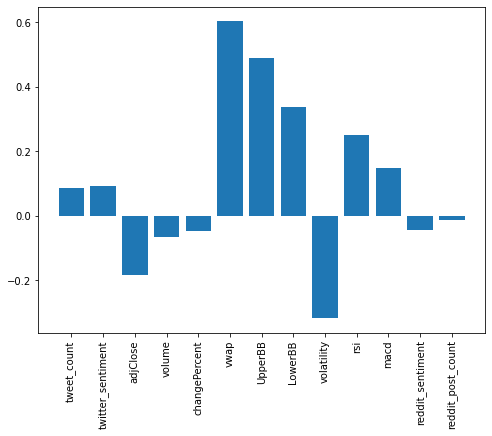

In [299]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [300]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
29/29 [==============================] - 2s 18ms/step - loss: 0.2760 - mean_absolute_error: 0.3734 - val_loss: 5.8551 - val_mean_absolute_error: 1.5797
Epoch 2/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0586 - mean_absolute_error: 0.1744 - val_loss: 5.2313 - val_mean_absolute_error: 1.5711
Epoch 3/20
29/29 [==============================] - 1s 20ms/step - loss: 0.0385 - mean_absolute_error: 0.1349 - val_loss: 3.9947 - val_mean_absolute_error: 1.3670
Epoch 4/20
29/29 [==============================] - 1s 19ms/step - loss: 0.0326 - mean_absolute_error: 0.1231 - val_loss: 4.4569 - val_mean_absolute_error: 1.4512
Epoch 5/20
29/29 [==============================] - 1s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.1164 - val_loss: 3.9717 - val_mean_absolute_error: 1.3529
Epoch 6/20
29/29 [==============================] - 1s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.1097 - val_loss: 4.2818 - val_mean_absolute_error: 1.4101
Epoch 7/20
9/9 [======

In [301]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['adjClose'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['adjClose']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

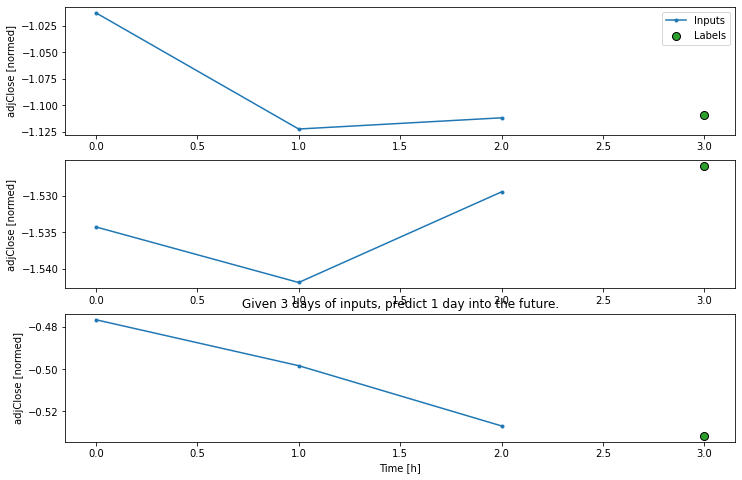

In [302]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [303]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [304]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 13)
Output shape: (32, 1, 1)


In [305]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 5ms/step - loss: 2.7361 - mean_absolute_error: 1.0376


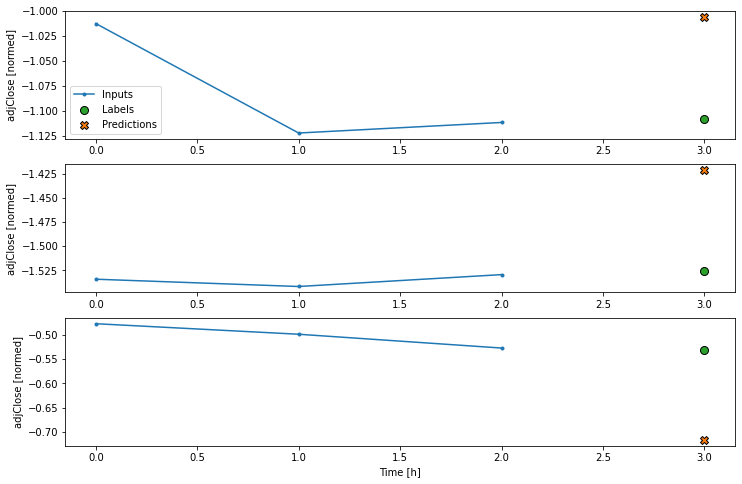

In [306]:
conv_window.plot(multi_step_dense)

In [307]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 13)

ValueError:Input 0 of layer dense_27 is incompatible with the layer: expected axis -1 of input shape to have value 39 but received input with shape (32, 312)


In [308]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [309]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 13)
Output shape: (32, 1, 1)


In [310]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 3ms/step - loss: 2.2302 - mean_absolute_error: 0.9895


In [311]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 13)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [312]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['adjClose'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['adjClose']

In [313]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 13)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


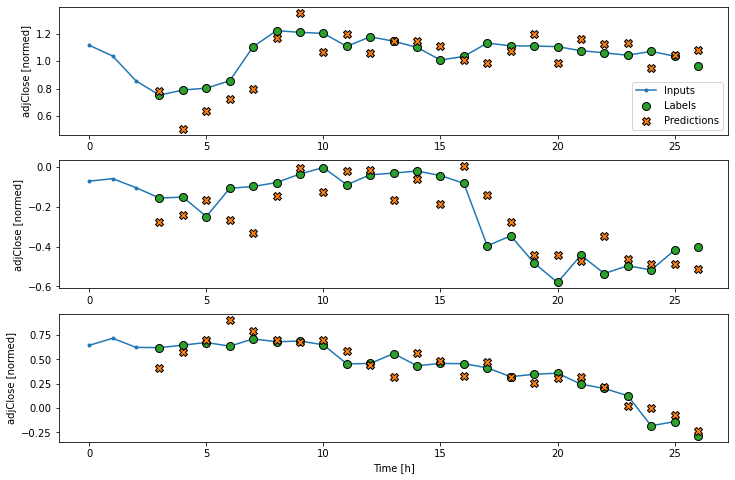

In [314]:
wide_conv_window.plot(conv_model)

In [315]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [316]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


In [317]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

8/8 [==============================] - 0s 10ms/step - loss: 73.6815 - mean_absolute_error: 5.7545


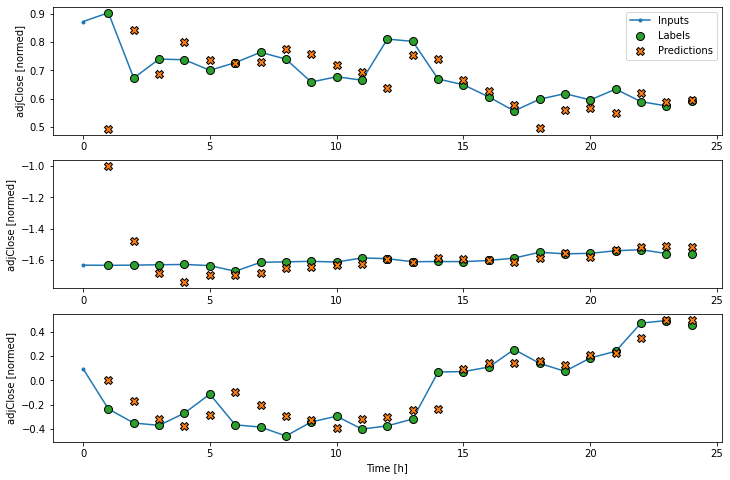

In [318]:
wide_window.plot(lstm_model)

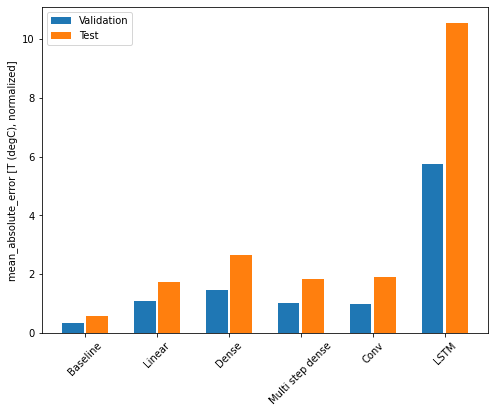

In [319]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [320]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5967
Linear      : 1.7561
Dense       : 2.6686
Multi step dense: 1.8286
Conv        : 1.9020
LSTM        : 10.5458
